In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# LOAD THE DATASET FROM KERAS LIBRARY

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


**Plot SOME IMAGES**

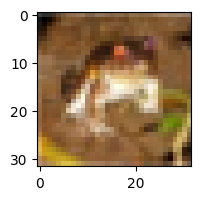

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

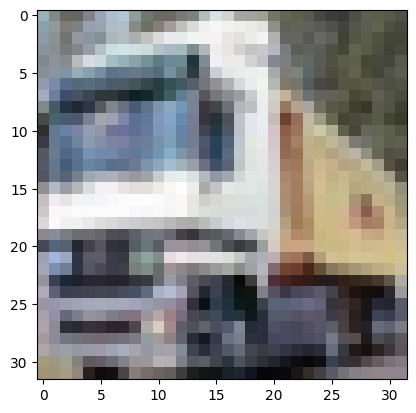

In [5]:
plt.imshow(X_train[1])

In [6]:
y_train=y_train.reshape(-1,)

In [7]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

**ARRAY OF CLASSES**

In [8]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

**FUNCTION TO PLOT IMAGE WITH ITS CLASS**

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

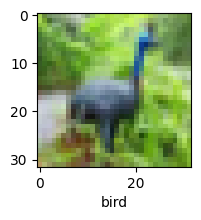

In [10]:
plot_sample(X_train,y_train,6)

In [11]:
X_train= X_train/255
X_test= X_test/255

**CNN MODEL**

In [12]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.4790 - accuracy: 0.4690
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1402 - accuracy: 0.5991
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0127 - accuracy: 0.6476
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9351 - accuracy: 0.6756
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8750 - accuracy: 0.6971
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8169 - accuracy: 0.7176
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.7707 - accuracy: 0.7323
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7305 - accuracy: 0.7449
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6926 - accuracy: 0.7597
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.65

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9208 - accuracy: 0.6989


[0.9208433628082275, 0.6988999843597412]

**PREDICTIONS**

In [16]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.89571616e-04, 3.90757896e-06, 6.60435820e-04, 9.48572397e-01,
        1.17802795e-03, 1.57655682e-02, 6.88103260e-04, 1.58301445e-05,
        3.20239402e-02, 2.02395851e-04],
       [2.11339793e-03, 6.26576319e-02, 7.68128666e-06, 2.73764317e-06,
        6.55581630e-07, 4.69084362e-08, 4.17868478e-08, 1.86585328e-06,
        9.35128212e-01, 8.77597413e-05],
       [3.53196673e-02, 3.67192000e-01, 1.98798487e-03, 3.91453542e-02,
        1.04138721e-02, 3.13898665e-03, 3.92488786e-04, 2.23027337e-02,
        3.99987489e-01, 1.20119415e-01],
       [9.14917350e-01, 3.51499277e-03, 2.89530978e-02, 1.96627737e-03,
        8.75366293e-03, 9.80804980e-05, 1.05951037e-02, 1.24254773e-04,
        3.10233664e-02, 5.38087079e-05],
       [1.15139915e-06, 1.26929681e-05, 1.33409873e-01, 4.75517213e-02,
        3.79537195e-01, 1.40212709e-02, 4.25001711e-01, 4.38348012e-04,
        2.50309458e-05, 9.73583724e-07]], dtype=float32)

**PREDICTED**

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 0, 6]

**ACTUAL**

In [18]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

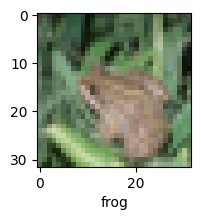

In [19]:
plot_sample(X_test, y_test,4)

In [20]:
classes[y_classes[4]]


'frog'